In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score
%matplotlib inline
import numpy as np
path="musk_csv.csv"
data_table=pd.read_csv(path)

# Exploratory Data Analysis

In [86]:
#Viewing a part of the data
data_table.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [87]:
#Profiling
data_table.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [88]:
#Checking for the presence of null values
data_table.isnull().values.any()

False

In [89]:
#Checking for unique names in the column molecule_name to ensure that only two types exist - Musk and Non-Musk
data_table['molecule_name'].unique()

array(['MUSK-211', 'MUSK-212', 'MUSK-213', 'MUSK-214', 'MUSK-215',
       'MUSK-217', 'MUSK-219', 'MUSK-224', 'MUSK-228', 'MUSK-238',
       'MUSK-240', 'MUSK-256', 'MUSK-273', 'MUSK-284', 'MUSK-287',
       'MUSK-294', 'MUSK-300', 'MUSK-306', 'MUSK-314', 'MUSK-321',
       'MUSK-322', 'MUSK-323', 'MUSK-330', 'MUSK-331', 'MUSK-333',
       'MUSK-344', 'MUSK-f152', 'MUSK-f158', 'MUSK-j33', 'MUSK-j51',
       'MUSK-jf15', 'MUSK-jf17', 'MUSK-jf46', 'MUSK-jf47', 'MUSK-jf58',
       'MUSK-jf59', 'MUSK-jf66', 'MUSK-jf67', 'MUSK-jf78', 'NON-MUSK-192',
       'NON-MUSK-197', 'NON-MUSK-199', 'NON-MUSK-200', 'NON-MUSK-207',
       'NON-MUSK-208', 'NON-MUSK-210', 'NON-MUSK-216', 'NON-MUSK-220',
       'NON-MUSK-226', 'NON-MUSK-232', 'NON-MUSK-233', 'NON-MUSK-244',
       'NON-MUSK-249', 'NON-MUSK-251', 'NON-MUSK-252', 'NON-MUSK-253',
       'NON-MUSK-270', 'NON-MUSK-271', 'NON-MUSK-286', 'NON-MUSK-288',
       'NON-MUSK-289', 'NON-MUSK-290', 'NON-MUSK-295', 'NON-MUSK-296',
       'NON-MUSK-297', 

In [90]:
#Renaming the 'class' column because it is a keyword in Python and column can't be accessed unless renamed
data_table=data_table.rename(columns={'class':'Label'})

#Checking if unique names in conformation_name column is equal to the number of rows
print(len(list(data_table['conformation_name'].unique())))
print(len(list(data_table['conformation_name'])))


6598
6598


In [97]:
#Selecting only the 166 feature columns as features and dropping other info like molecule name and conformation name
features=data_table.iloc[:,3:169]
features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80


# Plotting a correlation heatmap

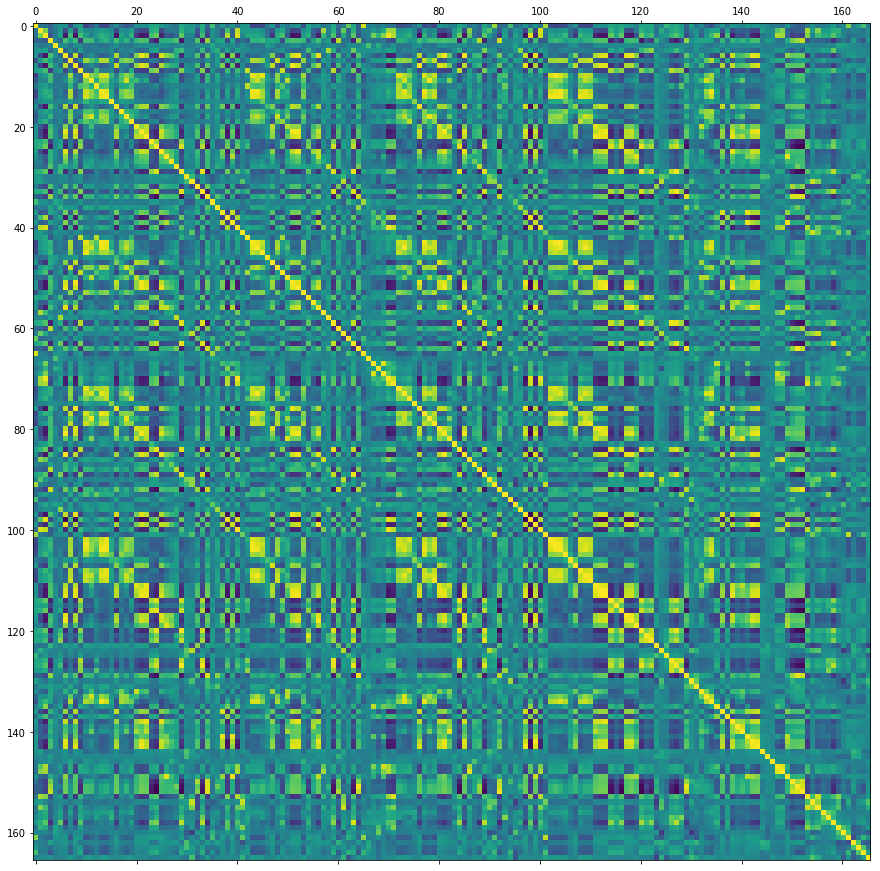

In [98]:
f = plt.figure(figsize=(19, 15))
corr=features.corr() #Correlation matrix
plt.matshow(corr,fignum=f.number)
plt.show()
# The plot shows high correlation between some features, we can conveniently drop those

In [99]:
#Dropping columns with high correlation

#First we take the absolute value of correlations
corr_matrix=corr.abs()

#Now we select the upper triangle matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Dropping correlated features

In [100]:
selected_features=features.drop(features[drop],axis=1)

In [101]:
selected_features.head()
#After dropping highly correlated features - we have 107 features left in the data now

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f156,f157,f158,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,3,-244,-308,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-5,-235,-59,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-163,-238,-134,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-7,-236,-60,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-8,-236,-60,52,104,137,168,-60,-135,80


# Correlation heatmap after dropping features

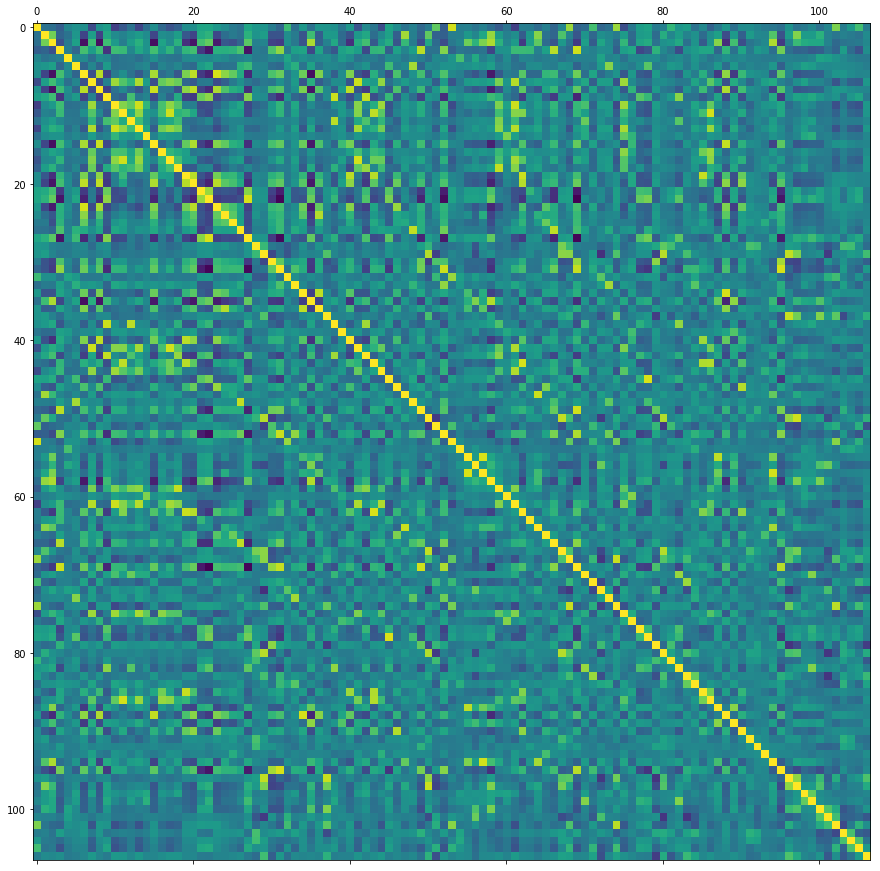

In [103]:
f = plt.figure(figsize=(19, 15))
corr=selected_features.corr() #Correlation matrix
plt.matshow(corr,fignum=f.number)
plt.show()
#The plot looks much cleaner now

# Performing Principal Component Analysis just to draw a comparison

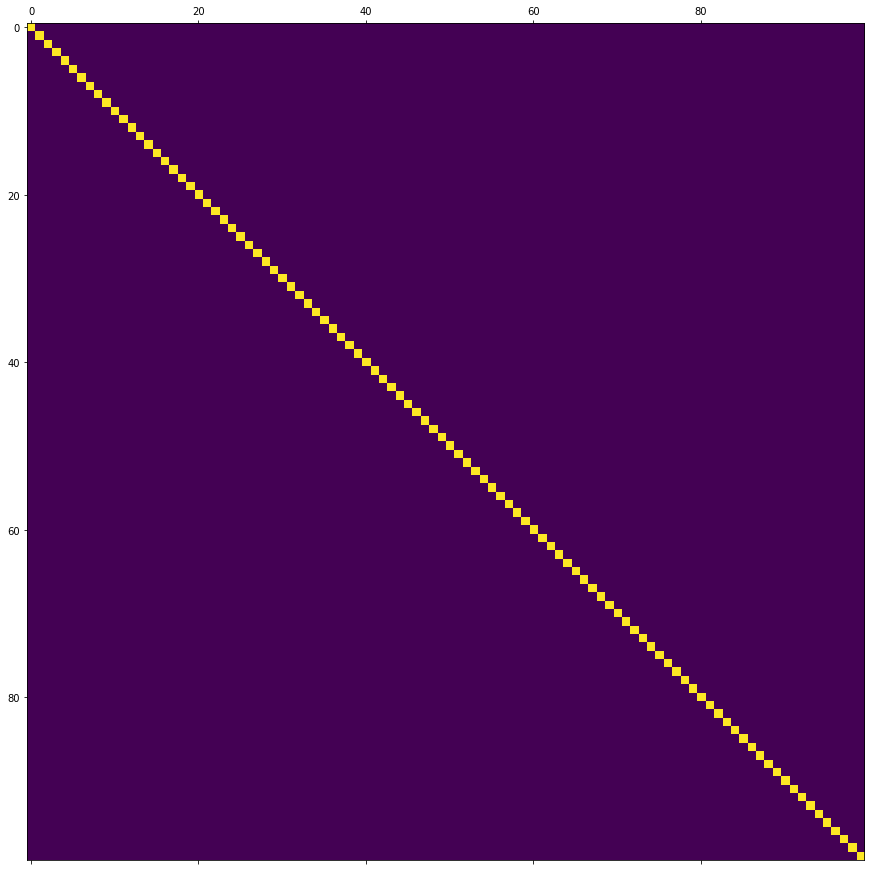

In [104]:
PCA_features=np.array(features)
pca = PCA(n_components=100)
PCA_transformed=pca.fit_transform(PCA_features)
PCA_transformed=pd.DataFrame(transformed)
#Plotting correlation heatmap using PCA features
f = plt.figure(figsize=(19, 15))
corr=PCA_transformed.corr() #Correlation matrix
plt.matshow(corr,fignum=f.number)
plt.show()

#Clearly the PCA analysis gives us a much better correlation plot with 100 features

In [109]:
PCA_transformed.shape

(6598, 100)

# Train -Test Split

In [114]:
#Train-Test split on data with manually selected features 
Labels= list(data_table['Label'])
X=np.array(selected_features)
X_train, X_test, y_train, y_test = train_test_split(X, Labels, test_size=0.20, random_state=42)

#Converting label list to np.array
y_train=np.array(y_train)
y_test=np.array(y_test)

In [115]:
#Train-Test split on data with PCA selected features 
X_PCA=np.array(PCA_transformed)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, Labels, test_size=0.20, random_state=42)

#Converting label list to np.array
y_PCA_train=np.array(y_PCA_train)
y_PCA_test=np.array(y_PCA_test)

# Standard scaling of the data

In [116]:
from sklearn.preprocessing import StandardScaler
#Since the data varies considerably as far as the scale is concerned
#Hence we need to standard scale the data in order to make our model perform better
scaler=StandardScaler()

#Standard scaling manually selected feature data - 
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

#Standard scaling PCA selected feature data - 
X_PCA_train_scaled=scaler.fit_transform(X_PCA_train)
X_PCA_test_scaled=scaler.fit_transform(X_PCA_test)

C:\Users\SAMARJEET KAUR\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\SAMARJEET KAUR\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\SAMARJEET KAUR\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\SAMARJEET KAUR\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Model - Multilayer Perceptron

# Testing on manually selected features

In [161]:
#Testing model performance on manually selected features
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense,Dropout


classifier1 = Sequential()
classifier1.add(Dense(70, activation='relu', kernel_initializer='random_normal', input_dim=107))
classifier1.add(Dense(40, activation='relu', kernel_initializer='random_normal'))
classifier1.add(Dense(20, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier1.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier1.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
#classifier1.fit(X_train_scaled,y_train, batch_size=1, epochs=20,shuffle=True,validation_split=0.1)


history = classifier1.fit(X_train_scaled,y_train, batch_size=1, epochs=15,shuffle=True,validation_split=0.1)
score=classifier1.evaluate(X_train_scaled,y_train,verbose=0)
print(score)


Train on 4750 samples, validate on 528 samples
Epoch 1/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.1702 - accuracy: 0.9349 - val_loss: 0.1205 - val_accuracy: 0.9489
Epoch 2/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0947 - accuracy: 0.9627 - val_loss: 0.1033 - val_accuracy: 0.9602
Epoch 3/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0727 - accuracy: 0.9731 - val_loss: 0.1023 - val_accuracy: 0.9678
Epoch 4/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0610 - accuracy: 0.9758 - val_loss: 0.0971 - val_accuracy: 0.9640
Epoch 5/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0482 - accuracy: 0.9813 - val_loss: 0.0936 - val_accuracy: 0.9602
Epoch 6/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0415 - accuracy: 0.9844 - val_loss: 0.1060 - val_accuracy: 0.9545
Epoch 7/15
4750/4750 [==============================] - 10s 2ms/sample 

# Performance scores of manually selected features

In [179]:
history.history.keys()
print("Loss:{}".format(history.history['loss'][-1]))
print("Validation Loss:{}".format(history.history['val_loss'][-1]))
print("Accuracy:{}".format(history.history['accuracy'][-1]))
print("Validation Accuracy:{}".format(history.history['val_accuracy'][-1]))

Loss:0.01496846079753044
Validation Loss:0.06476502161586166
Accuracy:0.9951578974723816
Validation Accuracy:0.9905303120613098


# Precision, Recall and F1 score for model performance on manually selected features

In [162]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred=classifier1.predict(X_test_scaled)
y_pred =(y_pred>0.5)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9924242424242424
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1111
           1       0.99      0.96      0.98       209

   micro avg       0.99      0.99      0.99      1320
   macro avg       0.99      0.98      0.99      1320
weighted avg       0.99      0.99      0.99      1320



In [164]:
classifier1.save("Credicxo Assignment/ModelPerformanceOnSelectedFeatures.h5") # Stored the weight file which gave 99%+ accuracy

# Performance plots for manually selected features

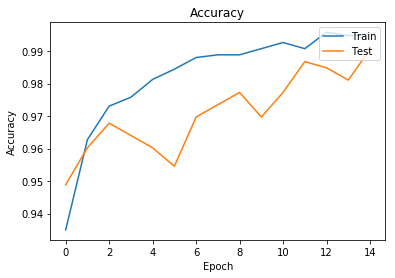

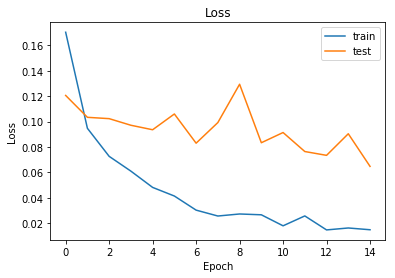

In [163]:

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

   #                                           PCA MODEL

# Testing the same model on PCA selected features

In [156]:
#Testing model performance on manually selected features
classifier = Sequential()
classifier.add(Dense(70, activation='relu', kernel_initializer='random_normal', input_dim=100))
classifier.add(Dense(40, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
#classifier.fit(X_PCA_train_scaled,y_PCA_train, batch_size=1, epochs=20,shuffle=True,validation_split=0.1)
history_PCA = classifier.fit(X_PCA_train_scaled,y_PCA_train, batch_size=1, epochs=15,shuffle=True,validation_split=0.1)
score=classifier.evaluate(X_PCA_train_scaled,y_PCA_train,verbose=0)
print(score)

Train on 4750 samples, validate on 528 samples
Epoch 1/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.1533 - accuracy: 0.9366 - val_loss: 0.1191 - val_accuracy: 0.9489
Epoch 2/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0542 - accuracy: 0.9811 - val_loss: 0.0706 - val_accuracy: 0.9716
Epoch 3/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0675 - val_accuracy: 0.9792
Epoch 4/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0321 - val_accuracy: 0.9886
Epoch 5/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.0579 - val_accuracy: 0.9811
Epoch 6/15
4750/4750 [==============================] - 10s 2ms/sample - loss: 0.0150 - accuracy: 0.9945 - val_loss: 0.0511 - val_accuracy: 0.9792
Epoch 7/15
4750/4750 [==============================] - 10s 2ms/sample 

# Precision, Recall and F1 score for model performance on PCA selected features

In [157]:
y_pred=classifier.predict(X_PCA_test_scaled)
y_pred =(y_pred>0.5)
print(accuracy_score(y_PCA_test, y_pred))
print(classification_report(y_PCA_test, y_pred))

#We're getting comparative results by using PCA selected 100 features

0.9916666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1111
           1       0.99      0.96      0.97       209

   micro avg       0.99      0.99      0.99      1320
   macro avg       0.99      0.98      0.98      1320
weighted avg       0.99      0.99      0.99      1320



# Performance scores of PCA selected features

In [180]:

print("Loss:{}".format(history_PCA.history['loss'][-1]))
print("Validation Loss:{}".format(history_PCA.history['val_loss'][-1]))
print("Accuracy:{}".format(history_PCA.history['accuracy'][-1]))
print("Validation Accuracy:{}".format(history_PCA.history['val_accuracy'][-1]))

Loss:0.0035991180945645893
Validation Loss:0.031037248547505582
Accuracy:0.9991579055786133
Validation Accuracy:0.9943181872367859


# Performance plots for PCA selected features

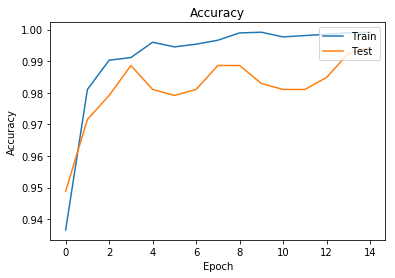

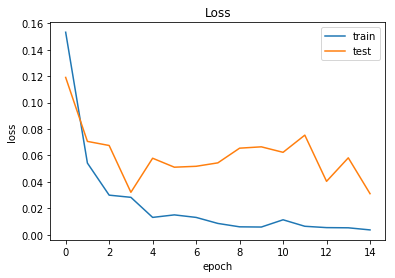

In [160]:

# Accuracy plot
plt.plot(history_PCA.history['accuracy'])
plt.plot(history_PCA.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Loss plot
plt.plot(history_PCA.history['loss'])
plt.plot(history_PCA.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [159]:
classifier.save("Credicxo Assignment/ModelPerformanceOnPCA.h5")